In [101]:
'''
CS6140 Assignment 3
Wing Man, Kwok
7 Jul 2022
'''

'\nCS6140 Assignment 3\nWing Man, Kwok\n7 Jul 2022\n'

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay

1227    1
1576    5
202     0
1184    7
428     1
       ..
1483    4
904     9
270     4
953     2
763     5
Name: target, Length: 360, dtype: int64
y_pred [1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 0 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5]
y_test [1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3

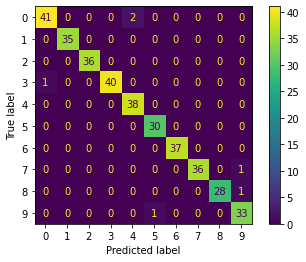

In [103]:
#Q3.1 Build a random forest classifier and find performance

digits = load_digits(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)

print(y_test)

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("y_pred", y_pred)
print("y_test", y_test.values)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print(classification_report(y_test, y_pred))